# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [5]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization


*   Visualize the created images in a 1 x 3 subplot using matplotlib.


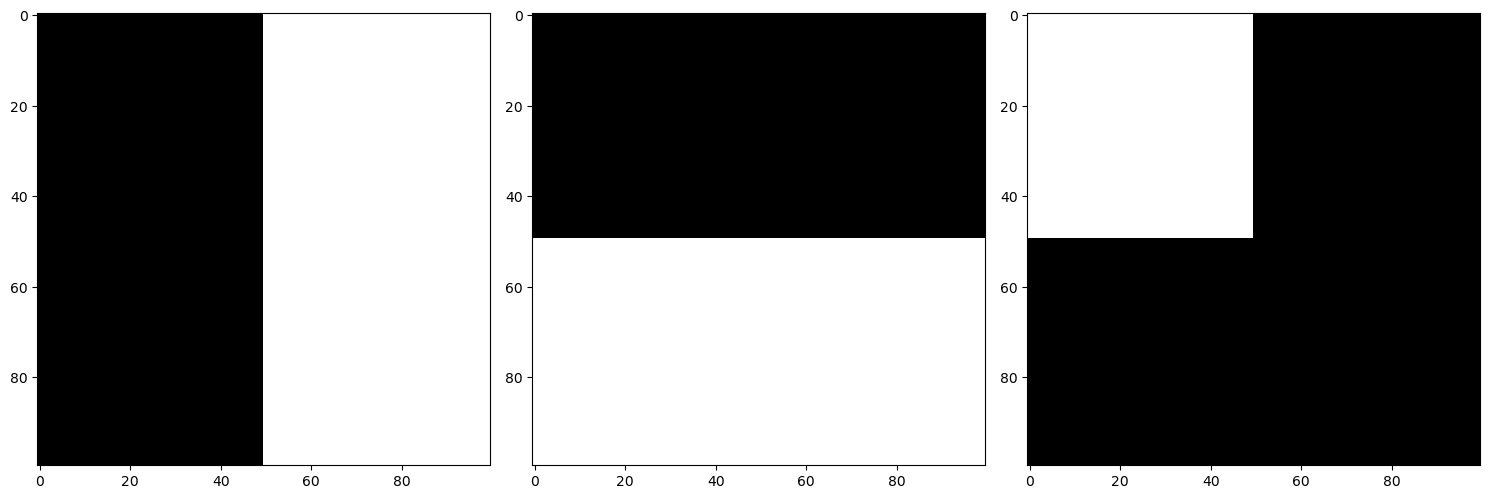

In [12]:
image1 = np.zeros((100, 100), dtype=np.uint8)
image1[:, 50:] = 255

image2 = np.zeros((100, 100), dtype=np.uint8)
image2[50:, :] = 255

image3 = np.zeros((100, 100), dtype=np.uint8)
image3 [:50, :50] = 255

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image1, cmap='gray')

axes[1].imshow(image2, cmap='gray')

axes[2].imshow(image3, cmap='gray')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

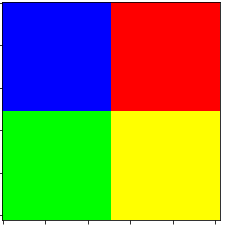
*Hint: Remember channels and color spaces*

In [21]:
# solution
image4 = np.zeros((100, 100, 3), dtype=np.uint8)
#blue
image4[:50, :50, 2] = 255 
#red
image4[:50, 50:, 0] = 255 
#green
image4[50:, :50, 1] = 255 
#yellow
image4[50:, 50:, 0] = 255  
image4 [50:, 50:, 1] = 255  


plt.imshow(image4)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder



*   Extract individual channels and plot them using matplotlib subplot.



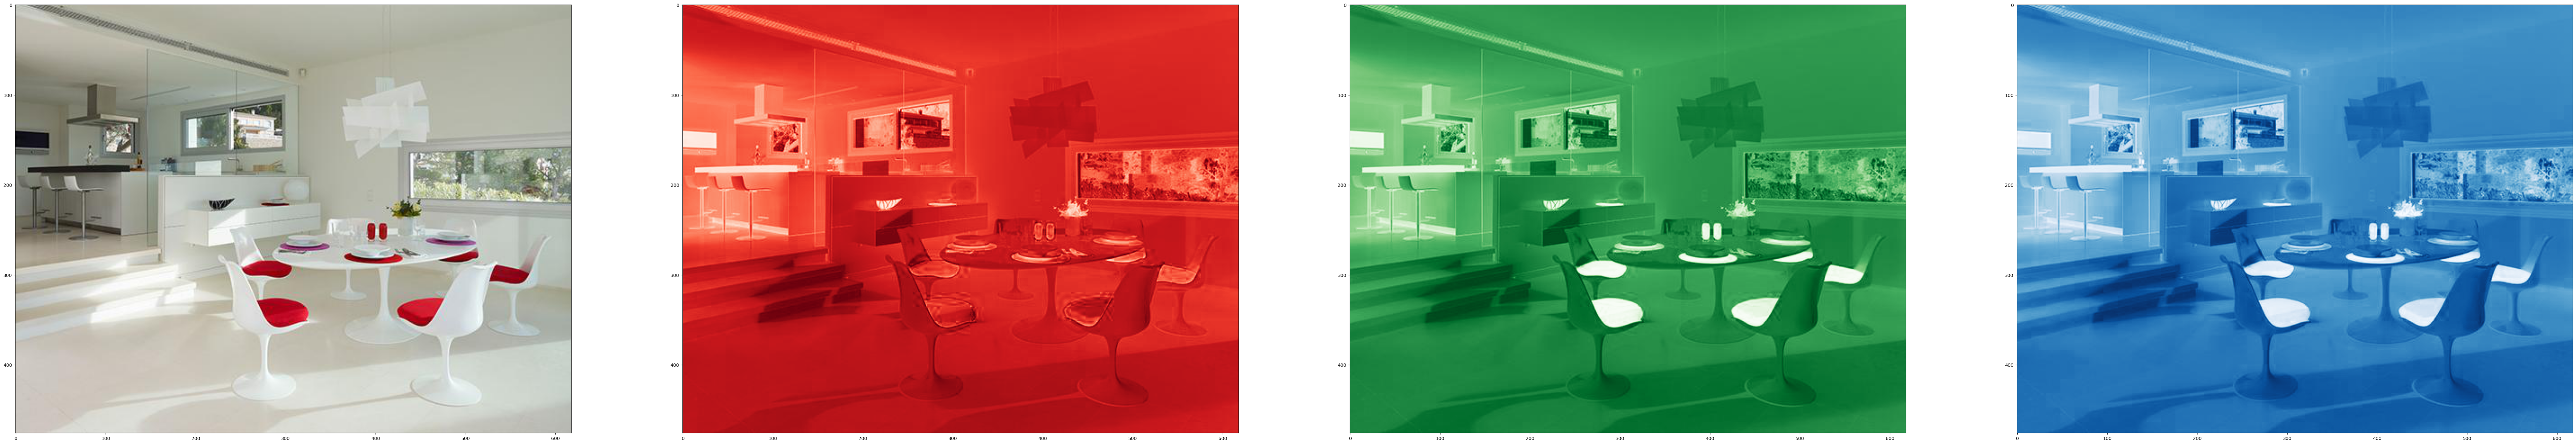

In [33]:
# solution
sillas = io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\sillas.jpg")


red = sillas[:, :, 0]
green = sillas[:, :, 1]
blue = sillas[:, :, 2]

fig, axes = plt.subplots(1, 4, figsize=(100, 50))

axes[0].imshow(sillas)

axes[1].imshow(red, cmap='Reds')

axes[2].imshow(green, cmap='Greens')

axes[3].imshow(blue, cmap='Blues')


plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [34]:
# solution
red2blue=sillas.copy()

red2blue[:,:,0], red2blue[:,:,2] = red2blue[:,:,2], red2blue[:,:, 0]


fig, axes = plt.subplots(1, 2, figsize=(100, 50))

axes[0].imshow(sillas)
axes[1].imshow(red2blue)
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*


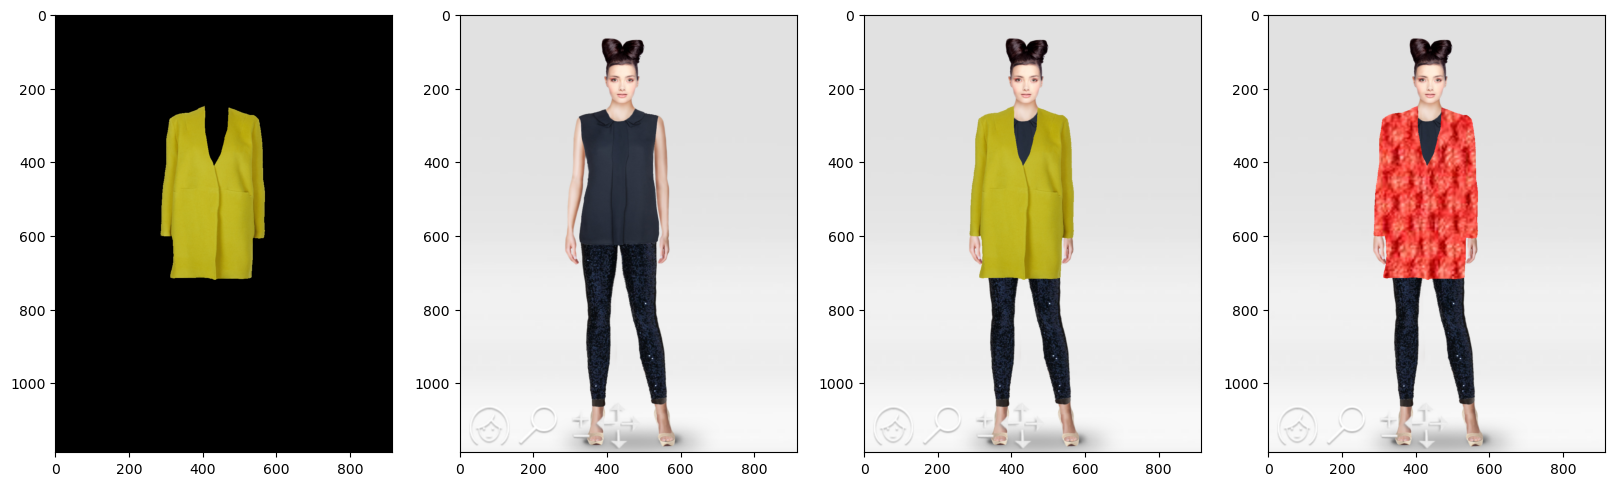

In [63]:
from skimage import transform, color

model = io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\model.png")
coat = io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\coat.png")

textures = [
    io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\texture.png"),
    io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\texture2.png"),
    io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\texture3.jpg"),
]


coat_hsv = color.rgb2hsv(coat[:, :, :3])

# range for yellow in HSV space
lower_yellow = np.array([0.12, 0.4, 0.3])  
upper_yellow = np.array([0.18, 1.0, 1.0])  

#yellow mask using the HSV ranges
mask = np.all((coat_hsv >= lower_yellow) & (coat_hsv <= upper_yellow), axis=-1)


texture = textures[1]
resizedtex = transform.resize(texture, (coat.shape[0], coat.shape[1]), anti_aliasing=True)

tcoat = coat.copy()

tcoat[mask, :3] = (resizedtex[mask] *255).astype(int)

coatedmodel = model.copy()
for c in range(3):
    coatedmodel[mask, c] = coat[mask, c]

texturedcoatmodel = model.copy()
for c in range(3):
    texturedcoatmodel[mask, c] = tcoat[mask, c]
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

axes[0].imshow(coat)
axes[1].imshow(model)
axes[2].imshow(coatedmodel)
axes[3].imshow(texturedcoatmodel)

plt.show()

#Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [81]:
from skimage import color

astronaut = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut)

# Compute the histogram of the grayscale image
hist, bin_edges = exposure.histogram(astronaut_gray)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(bin_edges, hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

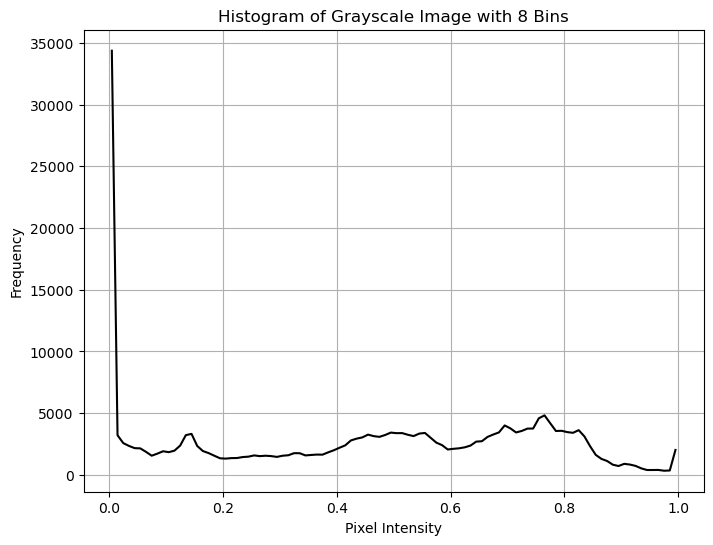

In [98]:

hist_8bins, bin_edges_8bins = exposure.histogram(astronaut_gray, nbins=100)

plt.figure(figsize=(8, 6))
plt.plot(bin_edges_8bins[:], hist_8bins, color='black')  # Aligning bin edges with histogram
plt.title('Histogram of Grayscale Image with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*
as the number of bins increases so does the details about the distribution of the data increase, along with that noise also increases. 

with fewer bins information is lost on subtler differences in pixel intensity


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


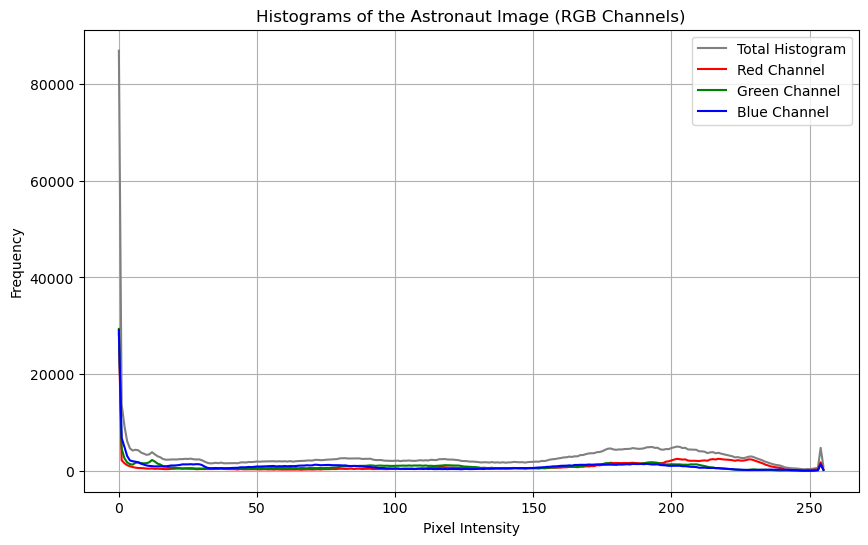

In [102]:
astronaut = data.astronaut()

hist_r, bin_edges_r = np.histogram(astronaut[:, :, 0], bins=256, range=(0, 256))  # Red channel
hist_g, bin_edges_g = np.histogram(astronaut[:, :, 1], bins=256, range=(0, 256))  # Green channel
hist_b, bin_edges_b = np.histogram(astronaut[:, :, 2], bins=256, range=(0, 256))  # Blue channel

# sum all channels
hist_total = hist_r + hist_g + hist_b

plt.figure(figsize=(10, 6))

plt.plot(bin_edges_r[:-1], hist_total, color='gray', label='Total Histogram')

plt.plot(bin_edges_r[:-1], hist_r, color='red', label='Red Channel')
plt.plot(bin_edges_g[:-1], hist_g, color='green', label='Green Channel')
plt.plot(bin_edges_b[:-1], hist_b, color='blue', label='Blue Channel')

plt.title('Histograms of the Astronaut Image (RGB Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



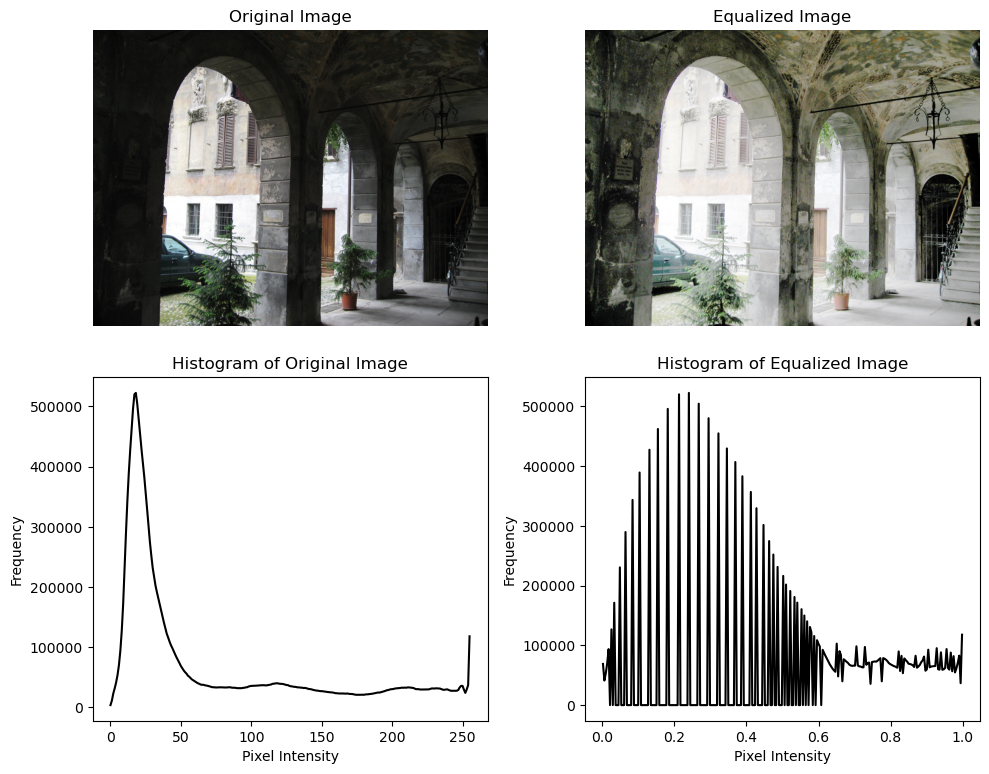

In [108]:

image = io.imread(r"C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK 6\DAY2\lab-computer-vision-main\lab-computer-vision-main\images\aquatermi_lowcontrast.jpg")

# Compute the histogram of the original image
hist_original, bin_edges_original = exposure.histogram(image)

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_equalized, bin_edges_equalized = exposure.histogram(image_equalized)

# Set up a 2 x 2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Equalized image
axes[0, 1].imshow(image_equalized, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')

# Histogram of the original image
axes[1, 0].plot(bin_edges_original, hist_original, color='black')
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

# Histogram of the equalized image
axes[1, 1].plot(bin_edges_equalized, hist_equalized, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*
The linea contrast sketch, as implied, scales more linearly and affects contrast globally instead of the local enhancement of CDF


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



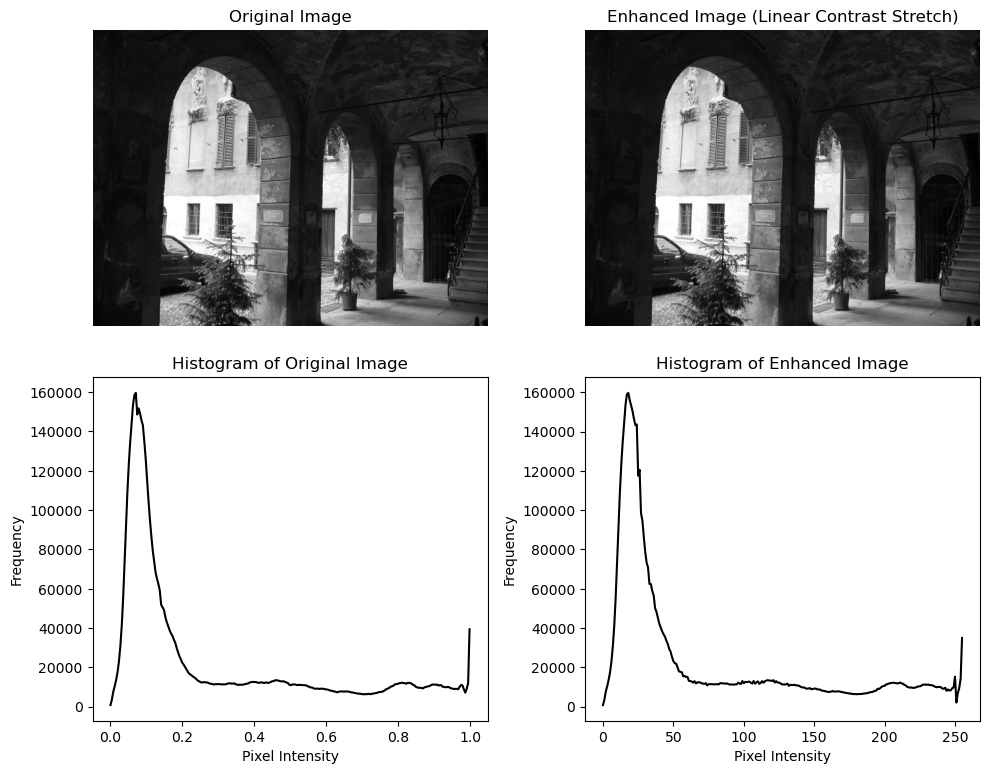

In [116]:
def linear_contrast_stretch(image, bins=256):
    # minimum and maximum pixel intensities in the image
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    
    # linear contrast stretching
    stretched_image = (image - min_intensity) / (max_intensity - min_intensity) * 255
    stretched_image = stretched_image.astype(np.uint8)  # Convert to 8-bit integer

    return stretched_image

# Visualization function
def visualize_linear_contrast_stretch(image, bins=256):
    enhanced_image = linear_contrast_stretch(image, bins)
    
    hist_original, bin_edges_original = exposure.histogram(image, nbins=bins)
    hist_enhanced, bin_edges_enhanced = exposure.histogram(enhanced_image, nbins=bins)
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(enhanced_image, cmap='gray')
    axes[0, 1].set_title('Enhanced Image (Linear Contrast Stretch)')
    axes[0, 1].axis('off')
    
    axes[1, 0].plot(bin_edges_original, hist_original, color='black')
    axes[1, 0].set_title('Histogram of Original Image')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')
    
    axes[1, 1].plot(bin_edges_enhanced, hist_enhanced, color='black')
    axes[1, 1].set_title('Histogram of Enhanced Image')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

image = io.imread('images/aquatermi_lowcontrast.jpg', as_gray=True)
visualize_linear_contrast_stretch(image)

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




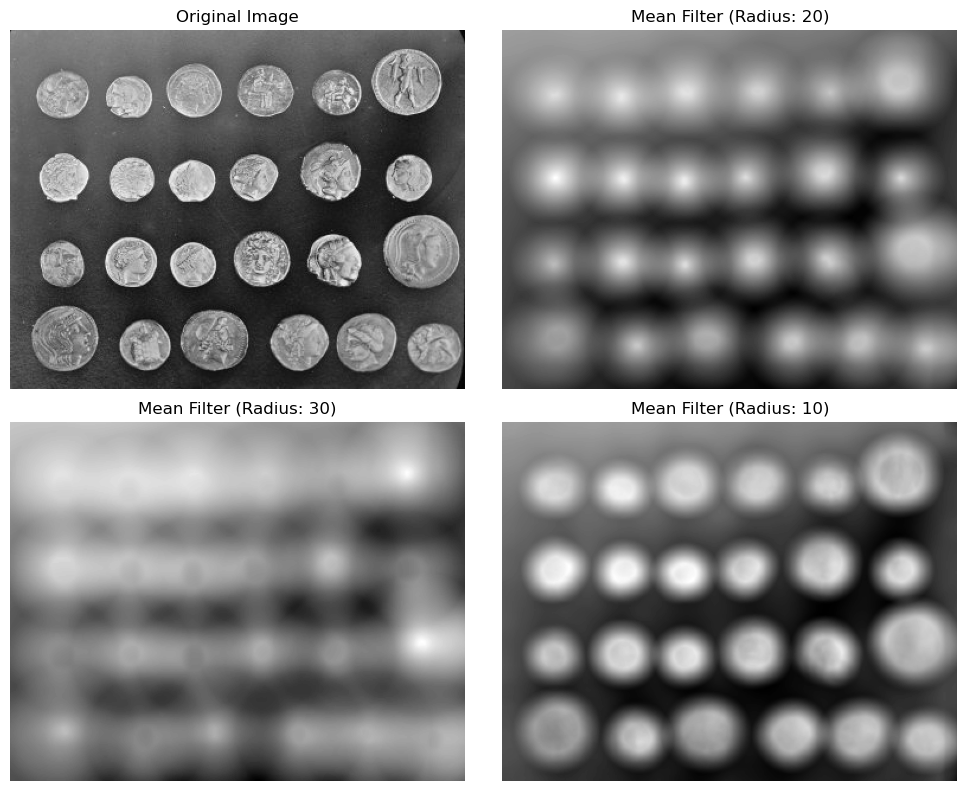

In [120]:
from skimage.filters import rank

image = data.coins()

radius_original = 20
radius_increased = radius_original + 10
radius_decreased = radius_original - 10

selem_original = morphology.disk(radius_original)
selem_increased = morphology.disk(radius_increased)
selem_decreased = morphology.disk(radius_decreased)

smoothened_original = rank.mean(image, selem_original)
smoothened_increased = rank.mean(image, selem_increased)
smoothened_decreased = rank.mean(image, selem_decreased)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(smoothened_original, cmap='gray')
axes[1].set_title(f'Mean Filter (Radius: {radius_original})')
axes[1].axis('off')

axes[2].imshow(smoothened_increased, cmap='gray')
axes[2].set_title(f'Mean Filter (Radius: {radius_increased})')
axes[2].axis('off')

axes[3].imshow(smoothened_decreased, cmap='gray')
axes[3].set_title(f'Mean Filter (Radius: {radius_decreased})')
axes[3].axis('off')

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

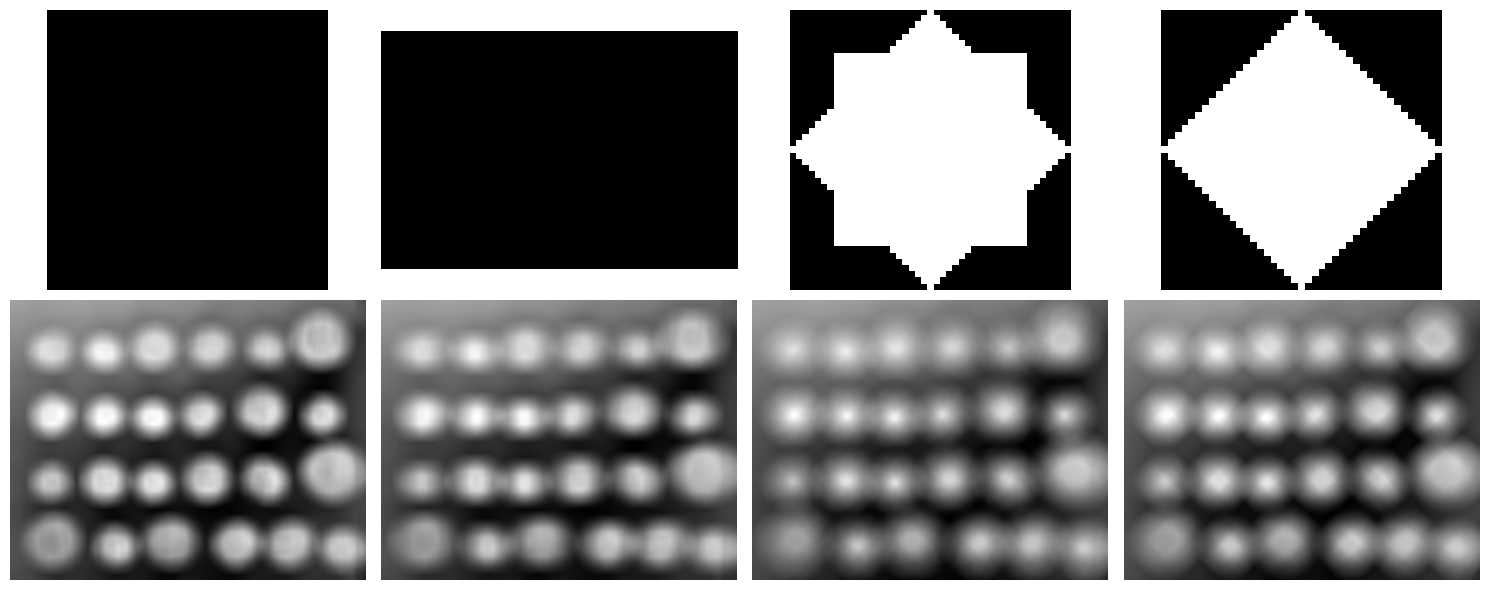

In [124]:
image = data.coins()

selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(15)
selem_diamond = morphology.diamond(20)

smoothened_square = rank.mean(image, selem_square)
smoothened_rectangle = rank.mean(image, selem_rectangle)
smoothened_star = rank.mean(image, selem_star)
smoothened_diamond = rank.mean(image, selem_diamond)

selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
results = [smoothened_square, smoothened_rectangle, smoothened_star, smoothened_diamond]

fig, axes = plt.subplots(2, len(selems), figsize=(15, 6))
for i, (selem, result) in enumerate(zip(selems, results)):
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(result, cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*
it increases or decreases the amount of smoothing 


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*
different structuring elements vary how edges or textures are smoothed



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*
The gaussian filter places more weight on the center pixels while the mean give each pixel the same weight. Gaussian filters are best for gaussian noise and preserving finer edges and details while the mean filter is best for random noise. 